In [1]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [2]:
X,y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

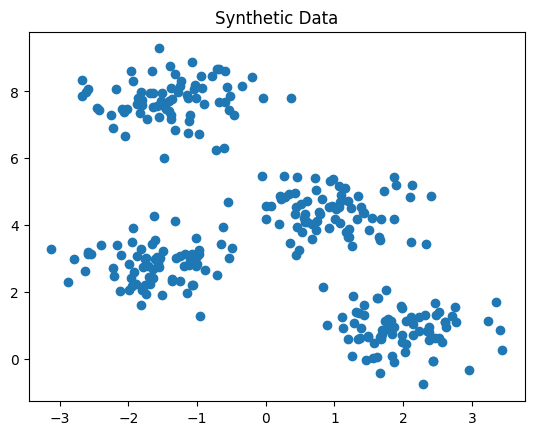

In [3]:
plt.scatter(X[:,0], X[:,1])
plt.title('Synthetic Data')
plt.show()

In [4]:
inertia =[]
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

In [5]:
inertia

[2812.137595303235,
 1439.861395200539,
 546.8911504626299,
 212.00599621083478,
 194.96601623554272,
 177.8689948217671,
 164.9562143191074,
 143.96669359684986,
 133.6180436385599,
 116.00599732388082]

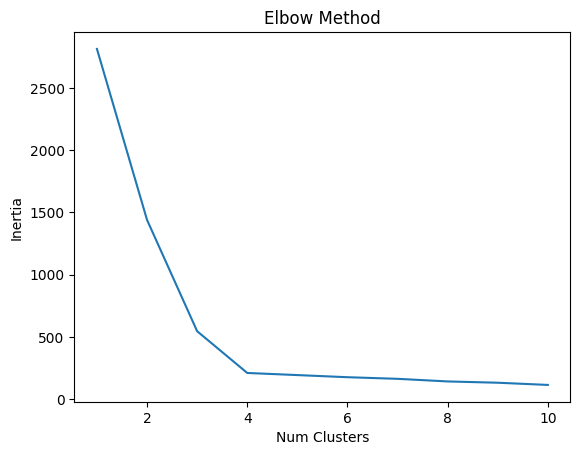

In [6]:
plt.plot(range(1,11), inertia)
plt.title('Elbow Method')
plt.xlabel('Num Clusters')
plt.ylabel('Inertia')
plt.show()

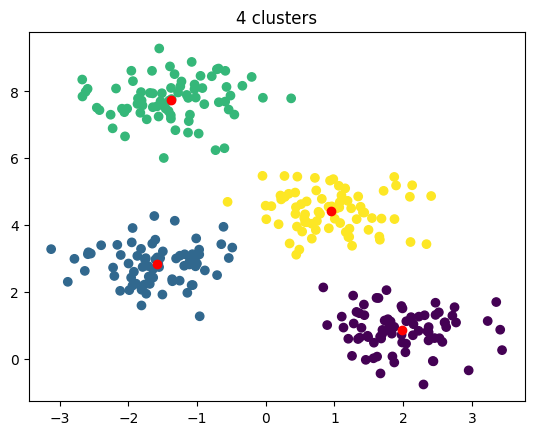

In [7]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
labels=kmeans.labels_
centers = kmeans.cluster_centers_
plt.scatter(X[:,0], X[:,1], c=labels)
plt.scatter(centers[:,0], centers[:,1], c='red')
plt.title('4 clusters')
plt.show()

In [8]:
import pandas as pd
df = pd.DataFrame(X)
df['label'] = labels
df

,0,1,label
0,0.836857,2.136359,0
1,-1.413658,7.409623,2
2,1.155213,5.099619,3
3,-1.018616,7.814915,2
4,1.271351,1.892542,0
...,...,...,...
295,1.973698,1.579798,0
296,2.518342,1.391766,0
297,0.438990,4.535929,3
298,0.369479,7.791105,2


In [10]:
sil_score = silhouette_score(X, labels)
print(sil_score)

0.6819938690643478


In [19]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

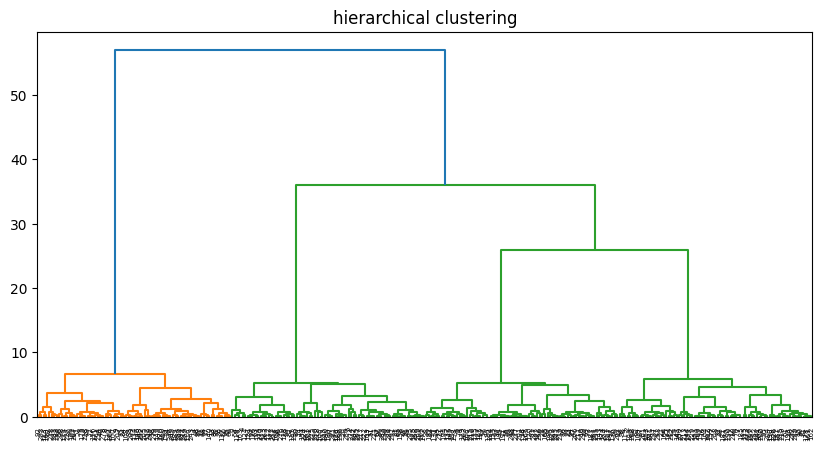

In [12]:
Z = linkage(X, method='ward')
plt.figure(figsize=(10,5))
dendrogram(Z)
plt.title('hierarchical clustering')
plt.show()

In [23]:
clusters = fcluster(Z, t=5, criterion='distance')



In [24]:
clusters

array([3, 2, 8, 1, 3, 5, 6, 9, 1, 1, 7, 2, 9, 2, 4, 9, 9, 5, 7, 6, 5, 5,
       8, 7, 6, 8, 5, 8, 7, 8, 1, 2, 9, 2, 2, 2, 2, 2, 6, 3, 9, 6, 8, 9,
       6, 7, 1, 7, 2, 5, 7, 5, 1, 3, 3, 7, 1, 6, 2, 3, 2, 9, 1, 7, 7, 7,
       2, 5, 2, 7, 9, 7, 1, 7, 6, 1, 7, 9, 5, 1, 4, 9, 3, 5, 1, 8, 5, 8,
       2, 2, 9, 5, 1, 7, 7, 9, 3, 5, 8, 7, 1, 4, 1, 5, 9, 5, 4, 9, 2, 8,
       6, 7, 3, 1, 3, 9, 2, 3, 3, 8, 7, 3, 7, 3, 3, 5, 3, 6, 3, 6, 1, 6,
       6, 4, 2, 6, 7, 2, 9, 1, 2, 7, 9, 7, 9, 6, 2, 8, 2, 2, 2, 9, 2, 8,
       4, 7, 1, 6, 5, 9, 1, 9, 9, 3, 8, 7, 6, 8, 3, 9, 9, 1, 3, 9, 7, 1,
       5, 5, 9, 7, 5, 9, 6, 7, 8, 9, 8, 9, 5, 2, 9, 7, 9, 9, 6, 6, 7, 9,
       6, 2, 9, 7, 4, 6, 9, 2, 7, 1, 9, 2, 9, 7, 8, 9, 2, 6, 6, 5, 4, 9,
       2, 5, 5, 7, 4, 7, 9, 1, 1, 9, 9, 1, 9, 3, 7, 9, 5, 7, 1, 7, 5, 8,
       5, 2, 2, 2, 2, 7, 7, 2, 9, 7, 3, 8, 7, 7, 7, 5, 5, 2, 9, 8, 7, 3,
       1, 7, 9, 1, 8, 5, 3, 7, 6, 9, 5, 4, 3, 9, 1, 2, 5, 5, 9, 5, 5, 5,
       2, 7, 1, 9, 4, 5, 2, 1, 1, 5, 5, 8, 1, 7], d

In [25]:
# t=5 in this case means we want to create 5 clusters
clusters_maxclust = fcluster(Z, t=5, criterion='maxclust')

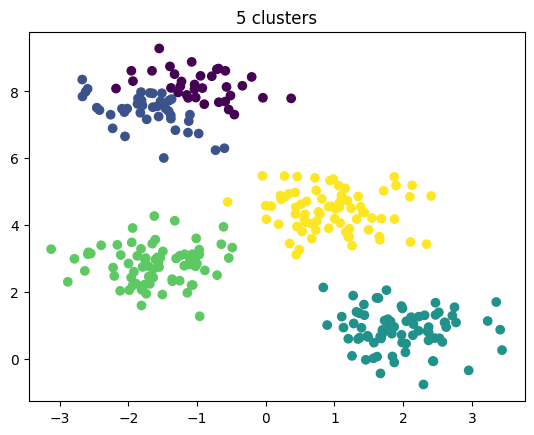

In [28]:
plt.scatter(X[:,0], X[:,1], c=clusters_maxclust)
plt.title('5 clusters')
plt.show()